In [1]:
import sys

sys.path.insert(0, "..")

In [2]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

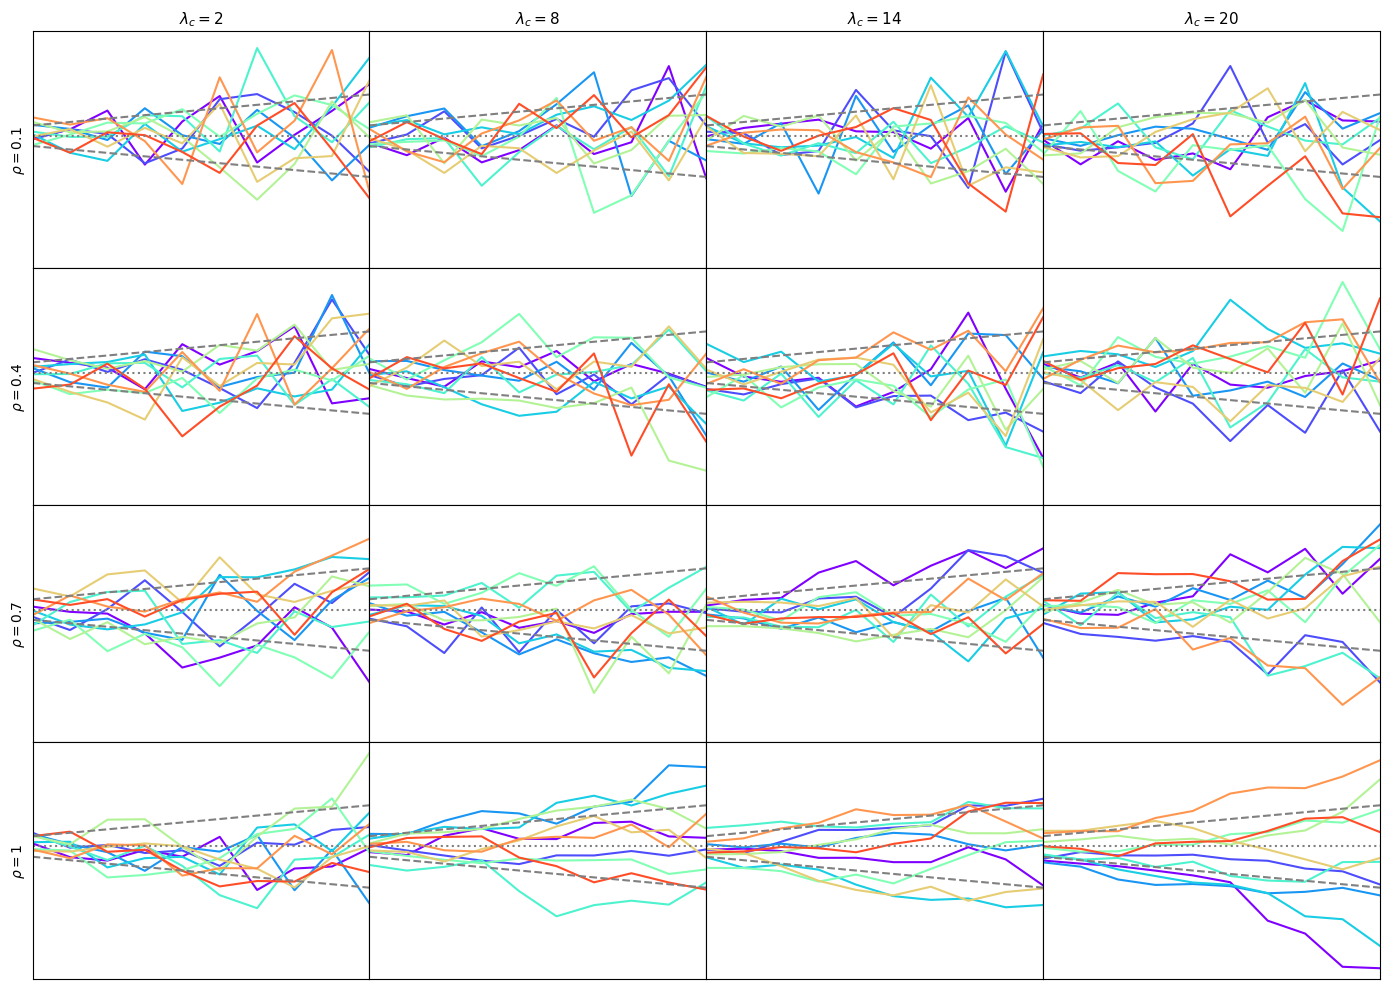

In [3]:
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(14, 10))

n_pts = 10
x = np.linspace(0, 10, n_pts)

err_scale = np.linspace(1, 4, n_pts)
err_vec = err_scale.reshape((-1, 1))

cmap = matplotlib.colormaps["rainbow"]
n_samples = 10

for i_row, (axrow, corr) in enumerate(zip(axes, np.linspace(0.1, 1, nrows))):
    axrow[0].set_ylabel(f"$ \\rho = {corr:.2g} $")
    for ax, corrlen in zip(axrow, np.linspace(2, 2 * n_pts, ncols)):
        if i_row == 0:
            ax.set_title(f"$ \\lambda_c = {corrlen:.3g} $", fontsize=11)

        for i_smpl in range(n_samples):
            corrmat = np.eye(n_pts) + corr * (
                linalg.toeplitz(np.exp(-np.arange(n_pts) / corrlen)) - np.eye(n_pts)
            )
            cov = (err_vec @ err_vec.T) * corrmat
            sample = np.random.multivariate_normal(mean=np.zeros(n_pts), cov=cov)
            ax.plot(x, sample, "-", color=cmap(i_smpl / n_samples))
            ax.set_xticks([])
            ax.set_yticks([])

        for sign in (1, -1):
            ax.plot(x, sign * err_scale, color="gray", linestyle="--")
        ax.axhline(0, color="gray", linestyle=":")
        ax.set_xlim(x[0], x[-1])

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)

In [4]:
from cr_knee_fit import experiments
from cr_knee_fit.elements import Element
from cr_knee_fit.fit_data import CRSpectrumData

data = CRSpectrumData.load(exp=experiments.dampe, element=Element.H, R_bounds=(0, np.inf))

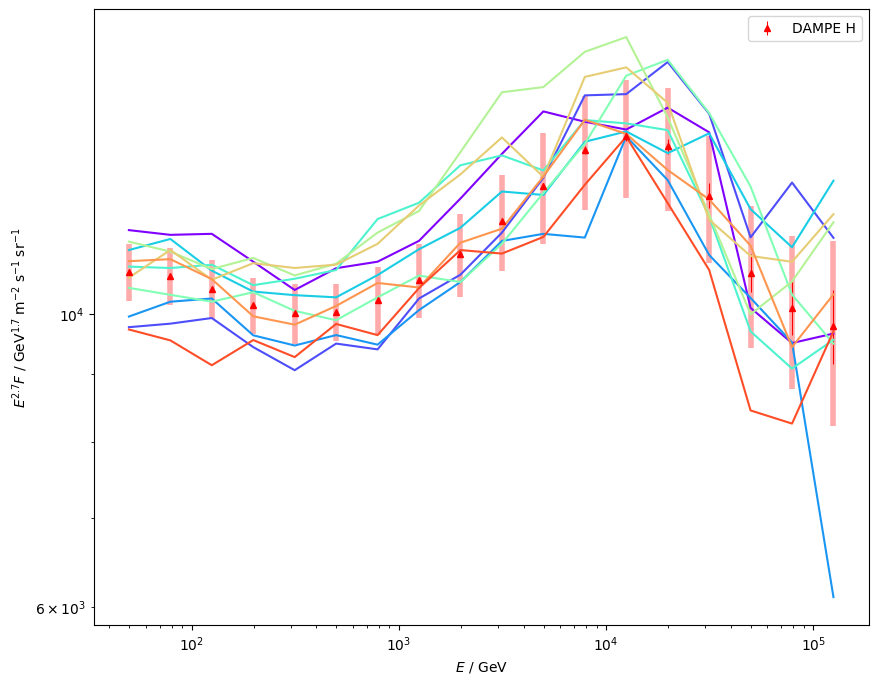

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))

scale = 2.7
data.plot(scale=scale, ax=ax)

cov = data.d.err_cov(corr_length=1.0)
mu = data.d.y
n_samples = 10
for i_smpl in range(n_samples):
    sample = np.random.multivariate_normal(mean=mu, cov=cov)
    ax.plot(data.d.x, data.d.scale_factor(scale) * sample, "-", color=cmap(i_smpl / n_samples))

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()